# Data Wrangling
#### By Tanmay Jain

## Table of Contents
<ul>
    <li><a href="#gather">Gathering Data</a></li>
    <li><a href="#assess">Assess</a></li>
    <ul>
        <li><a href="#quality">Quality Issues</a></li>
        <li><a href="#tidy">Tidiness Issues</a></li>
    </ul>
    <li><a href="#clean">Clean</a></li>
    <li><a href="#store">Store</a></li>
    <li><a href="#visualize">Analyze and Visualize</a></li>
</ul>

In [1]:
#Import all necessary libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import bs4
import tweepy
import config

/home/jaintanmay121/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id='gather'></a>
# Gathering Data

In [2]:
twitterdf=pd.read_csv('twitter-archive-enhanced-2.csv')

#### Downloading file Programmatically

In [3]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response=requests.get(url)

with open('image_predictions.tsv', mode='wb') as f:
    f.write(response.content)

In [4]:
img=pd.read_csv('image_predictions.tsv', sep='\t')

#### Using the Tweepy library to get tweets by ID

In [5]:
#The config file contains all the security keys
auth = tweepy.OAuthHandler(config.Consumer_Key, config.Consumer_Secret)
auth.set_access_token(config.Access_Token, config.Access_Token_Secret)

api = tweepy.API(auth, 
                 parser=tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [6]:
tweets=[]
noTweets=[]
for i in twitterdf.tweet_id:
    try:
        tweets.append(api.get_status(i))
    except:
        noTweets.append(i)

#Writing the JSON tweets in the file "tweet_json.txt"
with open('tweet_json.txt', mode = 'w') as f:
    json.dump(tweets, f)

In [7]:
tweets=pd.read_json('tweet_json.txt')

<a id='assess'></a>
# Assess

#### Assessing the "twitterdf" dataset

In [8]:
twitterdf.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
twitterdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
#Checking for any duplicates
twitterdf.tweet_id.duplicated().sum()

0

In [12]:
twitterdf.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [13]:
twitterdf.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [14]:
twitterdf.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [15]:
twitterdf.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Oliver         11
             ... 
Enchilada       1
Murphy          1
Hero            1
Hermione        1
officially      1
Name: name, Length: 957, dtype: int64

In [16]:
twitterdf.source

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2351    <a href="http://twitter.com/download/iphone" r...
2352    <a href="http://twitter.com/download/iphone" r...
2353    <a href="http://twitter.com/download/iphone" r...
2354    <a href="http://twitter.com/download/iphone" r...
2355    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 2356, dtype: object

#### Assessing the "img" dataset

In [17]:
img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
img.tweet_id.duplicated().sum()

0

In [20]:
img.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

#### Assessing the "tweets" dataset

m#Using only the important columns
tweets = tweets[['id', 'favorite_count', 'retweet_count']]

In [21]:
tweets.head()

,created_at,id,id_str,text,truncated,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,38841,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,33266,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,25063,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,42214,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,40361,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [22]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2345 non-null   datetime64[ns, UTC]
 1   id                             2345 non-null   int64              
 2   id_str                         2345 non-null   int64              
 3   text                           2345 non-null   object             
 4   truncated                      2345 non-null   bool               
 5   entities                       2345 non-null   object             
 6   extended_entities              1824 non-null   object             
 7   source                         2345 non-null   object             
 8   in_reply_to_status_id          78 non-null     float64            
 9   in_reply_to_status_id_str      78 non-null     float64            
 10  in_reply_to_user_id     

<a id='quality'></a>
## Quality Issues

### twitterdf
<ul>
    <li>The dataset contains retweets.</li>
    <li>Dataset consists of unwanted columns.</li>
    <li>Source column is in HTML format with action tags.</li>
    <li>Names contains values like "a".</li>
    <li>Columns "name", "floofer", "doggo", "pupper" have "None" instead of NaN.</li>
    <li>Contains rating_umerator and rating_denominator instead of rating.</li>
</ul>

### img
<ul>
    <li>There are 2075 rows in the dataset which is not equal to number of tweet_ids(2356) meaning incomplete data or tweets without images.</li>
    <li>Drop the irrelevant columns.</li>
    <li>Various columns for dog type which could be merged into one.</li>
</ul>

### tweets
<ul>
    <li>Dataset consists of unwanted columns.</li>
    <li>There are 2345 rows in the dataset which is not equal to number of tweet_ids(2356) meaning incomplete data.</li>
</ul>

<a id='tidy'></a>
## Tidiness Issues

<ul>
    <li>The tweet_id column is integer type.</li>
    <li>The columns "doggo", "pupper", "floofer" should be one column.</li>
    <li>The three datasets should be one since they are related.</li>
</ul>

<a id='clean'></a>
# Cleaning Data

In [33]:
twitterdf_copy=twitterdf.copy()
tweets_copy=tweets.copy()
img_copy=img.copy()

#### Removing the retweets

In [24]:
twitterdf_copy = twitterdf_copy[twitterdf_copy.retweeted_status_user_id.isna()]

#### Create a single column for doggo, floofer, pupper, puppo

In [38]:
twitterdf_copy = pd.melt(twitterdf_copy, id_vars=['tweet_id',  
                                                  'in_reply_to_status_id',
                                                  'in_reply_to_user_id',
                                                   'timestamp',
                                                  'source',
                                                   'text',
                                                  'retweeted_status_id',
                                                  'retweeted_status_user_id',
                                                  'retweeted_status_timestamp',
                                                  'expanded_urls',
                                                   'rating_numerator',
                                                   'rating_denominator',
                                                   'name'],
                               var_name='dogs', value_name='dogs_stage')

twitterdf_copy = twitterdf_copy.drop('dogs', 1)

In [40]:
twitterdf_copy.dogs_stage.value_counts()

None       9030
pupper      257
doggo        97
puppo        30
floofer      10
Name: dogs_stage, dtype: int64

#### Converting the Datatype of tweet_id

In [41]:
twitterdf_copy['tweet_id'] = twitterdf_copy['tweet_id'].astype(str)

In [42]:
type(twitterdf_copy.tweet_id[0])

str

#### Correcting names

In [43]:
twitterdf_copy.name.value_counts()

None          2980
a              220
Charlie         48
Oliver          44
Cooper          44
              ... 
Enchilada        4
Murphy           4
Hero             4
Florence         4
officially       4
Name: name, Length: 957, dtype: int64

In [44]:
lower = []
for i in twitterdf_copy.name:
    if i.islower() and i not in lower:
        lower.append(i)
print(lower)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [45]:
twitterdf_copy.replace(lower, np.nan, inplace=True)
twitterdf_copy.replace("None", np.nan, inplace=True)

In [46]:
twitterdf_copy.name.value_counts()

Charlie      48
Oliver       44
Cooper       44
Lucy         44
Lola         40
             ..
Eriq          4
Swagger       4
Dietrich      4
Banditt       4
Genevieve     4
Name: name, Length: 931, dtype: int64

#### Finding out the Ratings

In [47]:
twitterdf_copy['ratings']=twitterdf_copy.rating_numerator/twitterdf_copy.rating_denominator

#### Dropping the unwanted columns from twitterdf

In [48]:
twitterdf_copy=twitterdf_copy.drop(['in_reply_to_status_id',
                                    'source', 
                                    'in_reply_to_user_id', 
                                    'retweeted_status_id', 
                                    'retweeted_status_user_id',  
                                    'retweeted_status_timestamp',  
                                    'expanded_urls',
                                    'rating_numerator', 
                                    'rating_denominator'], axis=1)

#### Making a single column for different types of dogs

In [50]:
dog_type=[]
confidence=[]
def classify(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_type.append(image_prediction_clean['p1'])
        confidence.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_type.append(image_prediction_clean['p2'])
        confidence.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_type.append(image_prediction_clean['p3'])
        confidence.append(image_prediction_clean['p3_conf'])
    else:
        dog_type.append(np.nan)
        confidence.append(np.nan)

In [51]:
img_copy.apply(classify, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
2070    None
2071    None
2072    None
2073    None
2074    None
Length: 2075, dtype: object

In [52]:
img_copy['dog_type']=dog_type
img_copy['conidence']=confidence

#### Drop unwanted columns from img

In [53]:
img_copy = img_copy.drop(['img_num',
                          'p1','p1_conf',
                          'p1_dog','p2',
                          'p2_conf',
                          'p2_dog',
                          'p3','p3_conf',
                          'p3_dog'], axis=1)

#### Change Datatype of tweet_id

In [54]:
img_copy['tweet_id'] = img_copy['tweet_id'].astype(str)

In [55]:
type(img_copy.tweet_id[0])

str

#### Dropping irrelevent columns from tweets_copy

In [56]:
tweets_copy=tweets_copy.drop(['in_reply_to_status_id', 
              'in_reply_to_user_id',
              'in_reply_to_status_id_str',
              'in_reply_to_user_id_str',
              'in_reply_to_screen_name',
              'contributors',
              'is_quote_status',
              'source',
              'truncated',
              'possibly_sensitive',
              'possibly_sensitive_appealable',
              'lang',
              'retweeted_status',
              'quoted_status_id',
              'quoted_status_id_str',
              'quoted_status'], axis=1)

In [57]:
tweets_copy['tweet_id'] = tweets_copy['id'].astype(str)
tweets_copy.drop('id', axis=1, inplace=True)

#### Merging the three datasets into one

In [58]:
twitter=pd.merge(tweets_copy, img_copy, on=['tweet_id'] )

In [59]:
twitter=pd.merge(twitter, twitterdf_copy, on=['tweet_id'])

<a id='store'></a>
# Storing the Data

In [60]:
twitter.to_csv('twitter_archive_master.csv', index=False)

<a id='visualize'></a>
# Analyze and Visualize the Data

#### Depicting relation between Favourite count and retweet count

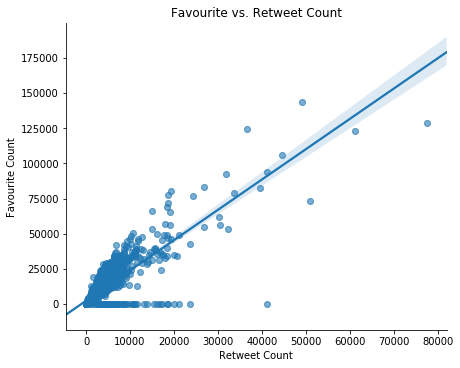

In [102]:
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter,
           height = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favourite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favourite Count')
plt.show()

> This depicts that Favourite Count and Retweet count are **highly correlated**.

#### Displaying Top 10 most tweeted breeds

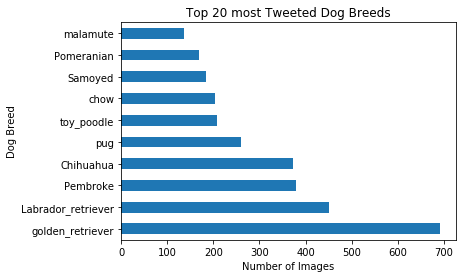

In [117]:
twitter.dog_type.value_counts()[:10].plot(kind='barh')
plt.title('Top 20 most Tweeted Dog Breeds')
plt.xlabel('Number of Images')
plt.ylabel('Dog Breed')
plt.show()

> From this, we can see that **Golden Retriever** is the most tweeted dog breed by a huge margin, followed by Labrador and Pembroke.

#### Standardized Ratings over Time

In [108]:
twitter.timestamp=twitter.timestamp.apply(lambda x: x[:10])

<function matplotlib.pyplot.show(*args, **kw)>

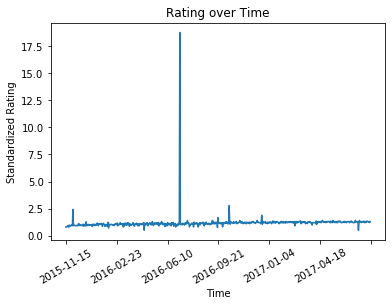

In [109]:
twitter.groupby('timestamp')['ratings'].mean().plot(kind='line')
plt.title('Rating over Time')
plt.xlabel('Time')
plt.xticks(rotation=30)
plt.ylabel('Standardized Rating')
plt.show

Since most of the values lie near zero, we can limit the y-axis to have a better look

<function matplotlib.pyplot.show(*args, **kw)>

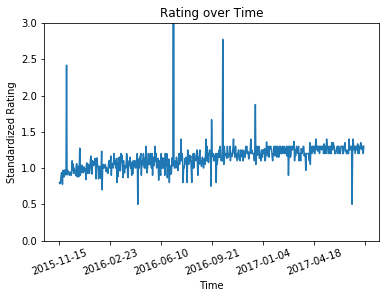

In [115]:
twitter.groupby('timestamp')['ratings'].mean().plot(kind='line')
plt.ylim(0,3)
plt.title('Rating over Time')
plt.xlabel('Time')
plt.xticks(rotation=20)
plt.ylabel('Standardized Rating')
plt.show